In [4]:
import pandas as pd 

In [5]:
from warnings import filterwarnings
filterwarnings('ignore')

In [6]:
ad= pd.read_csv("Advertising.csv")
df=ad.copy()
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
#indexi değişken olarak almış bundan kurtulmak için : 
df= df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
# ikinci yol , Bu satırları kullan anlamında!
ad= pd.read_csv("Advertising.csv", usecols=[1,2,3,4])
df=ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [11]:
df.corr()
#En yüksek sayış tv de gibi görünüyor. 

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [12]:
import seaborn as sns
sns.pairplot(df, kind="reg");

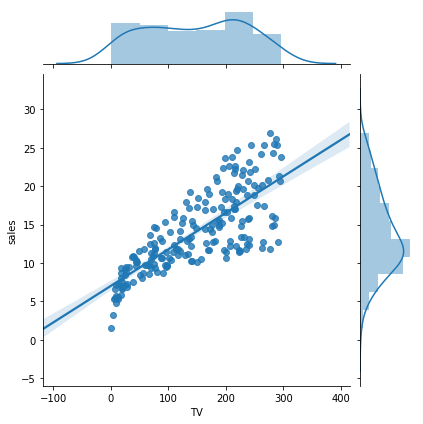

In [13]:
#tvdeki satışlara odaklandığımızı düşünelim
sns.jointplot(x= "TV", y="sales",data= df , kind="reg");

# Stats Model ile Modelleme

In [14]:
import statsmodels.api as sm

In [15]:
# İlk Modelleme 
X= df[["TV"]]
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [16]:
#Tek boyutlu bir değişken old için bir sabit değerini ekledik. 
X=sm.add_constant(X)
X[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [17]:
y= df["sales"]
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [18]:
#model kurma
lm=sm.OLS(y,X) 

In [19]:
model=lm.fit()

In [20]:
model.summary()
#Mülakatlarda bu çıktıların açıklanması beklenir. 
#Dep. Variable (Bağımlı Değişken) = Sales 

#Method = Least Squares(En küçük kareler)

#R-squared(R kare)= Bu çıktının en önemli değerlerinden birisi. Bağımsız değişkenin bağımlı değerdeki 
#değişkenliği açıklama başarısıdır. yani Tv değişkeni sales değişkenindeki değişkenliği yaklaşık %60 ını 
#açıklayabilmektedir. R-squared açıklanabilirlik oranıdır.

#Adj. R-squared(Düzeltilmiş R Kare) = R-squared değişkeni yapısı itibari ile değişken sayısı arttıkça 
#artacaktır. İlgili ilgisiz tüm değerlerle artar. Bu artış bize iyi yolda olduğumuzu düşündürtebilir.
#Bu bizi yanıltacaktır.  Adj. R-squared değeri bize R-squared deki gereksiz verileden ayıklar. 
#yani Adj. R-squared, R-squared ye göre daha az duyarlıdır. Onlarca değişken olduğunda Adj. R-squared 
#değeri bizim için daha önemlidir. 

#F-statistic= Modelin anlamlılığına ilişkin bir istatistiktir. 

#Prob (F-statistic)= pvalue değeridir.

#AIC& BIC Model karşılaştırmak için kullanılan istatistiklerdir. 

#No. Observations= Gözlem Sayısı 

#Df Residuals= Serbestlik derecesi 

#Modelin  en önemli kısmı ikinci tablodur.(coef ile başlayan)
#coef-const(7.0326)= diğer değişkenlerde bir değişim olmadıpında y nin beklenen değeridir. Yani ort 
#satış değeridir. (yani sabit eğrinin y eksenini kestiği nokta)

#coef-TV(0.0475)= TV harcamalarında bir birimlik artış old. satışlarda 0.0475 kadar ort artış olur 
#demektir. 

#std err=Standart hatadır. Bunun anlamlı olup olmadığını anlamak için t istatistiği adına P value 
#değerleri verilmiş. Burda P>|t| ifadesi her iki değer içinde 0 dır yani her iki deer de anlamlıdır. 

#[0.025	0.975] Güven aralığı = Yani TV ist güven aralığı 0.042-0.053 arasında olmalıdır. Çok değerli bir 
#bilgidir. Bu bilgiye bakılarak bazı stratejik değerler belirlenebilir. 



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 10 Dec 2021   Prob (F-statistic):           1.47e-42
Time:                        17:32:06   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
import statsmodels.formula.api as smf
lm = smf.ols("sales ~ TV", df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 10 Dec 2021   Prob (F-statistic):           1.47e-42
Time:                        17:32:06   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
model.params
# Modelin parametreleri. Beta0 ve Beta1 değerleri.

Intercept    7.032594
TV           0.047537
dtype: float64

In [23]:
model.summary().tables[1]
#Üstteki uzun tabloda index 0,1,2 değerli tablolar vardır. Sadece 1 Değerli tabloyu çekemek istediğimizde 
#Bu şekilde index değeri girerek yapabiliriz. 

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [24]:
#Katsayıların güven aralıklarına erişmek için 
model.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [25]:
#Sadece modelin anlamlılığına ilişkin ist erişmek istersek. 
model.f_pvalue

1.4673897001947095e-42

In [26]:
#P value değerini daha analmalı görmek için 
print ( "Pvalue: ","%.4f" % model.f_pvalue)

Pvalue:  0.0000


In [27]:
#F ist değerini daha analmalı görmek için 
print ( "F value: ","%.4f" % model.fvalue)

F value:  312.1450


In [28]:
print ( "T value: ","%.4f" % model.tvalues[0:1])

T value:  15.3603


In [29]:
# Modelin anlamlılığına ilişkin değerlere erişmek istenirse 
model.mse_model #hata kareler ort değeri.
#Satış ort 14 olan bir değişken için bu sayı çok fazla 

3314.6181668686486

In [30]:
model.rsquared

0.611875050850071

In [31]:
model.rsquared_adj

0.6099148238341623

In [32]:
# Modelin tahmin ettiğimiz y değerlere erişmek 
model.fittedvalues[0:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [33]:
# Modelin gerçek değerlerine erişmek 
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [34]:
#!! Çoklu doğrusal reg modelin çıktısını verip modelin matematiksel formunu yazın denir. Şu şekilde yazılr
print("Sales: ", str("%.2f" % model.params[0]) ,"+" , "TV" , "*", str("%.2f" % model.params[1]))

Sales:  7.03 + TV * 0.05


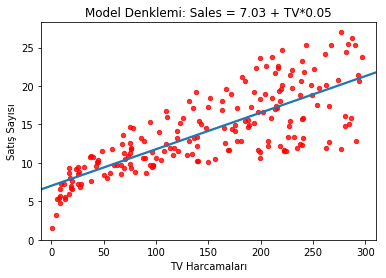

In [35]:
# yaptığımız matematiksel işlemin görselleştirilmesi. 
g = sns.regplot(df["TV"], df["sales"], ci=None, scatter_kws={'color':'red', 's':19})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
import matplotlib.pyplot as plt
plt.xlim(-10,310)
plt.ylim(bottom=0);

In [36]:
#Sklearn kütüphanesi ile model kurmak 
from sklearn.linear_model import LinearRegression

In [37]:
X=df[["TV"]]
y=df["sales"]
reg=LinearRegression()
model=reg.fit(X,y)
model.intercept_
model.coef_

array([0.04753664])

In [38]:
model.score(X,y) #Rkare değeri

0.611875050850071

In [39]:
model.predict(X)[0:10] # Tahmin edilen değerler. 

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

# Tahmin 

Model denklemi:

Sales = 7.03 + TV*0.04

Örneğin 30 birim TV harcaması olduğunda satışların tahmini değeri ne olur?

In [40]:
7.03 + 30*0.04

8.23

In [41]:
X=df[["TV"]]
y=df["sales"]
reg=LinearRegression()
model=reg.fit(X,y)

In [42]:
# model.predict içine bir değer yazıldıpında matematikselformu ziyaret eder ve içine girebileceği bir değr
#varsa girip tahmini değeri döndürür. 
model.predict([[30]])
# İki çıktının farklı olmasının sebebi biz virgülden sonraki tüm değerleri almadık. 

array([8.45869276])

In [43]:
# Birden fazla veri için tahmin istenirse .
yeni_deger=[[5],[90],[200]]
model.predict(yeni_deger)

array([ 7.27027675, 11.31089119, 16.53992164])

# Artıkların Makine Öğrenmesindeki Önemi 

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
lm = smf.ols("sales ~ TV", df)
model = lm.fit()

In [46]:
mse = mean_squared_error(y, model.fittedvalues)
#tahmin edilen değerler ve gerçek değerler arasındaki farkların karelerinin ort. 

In [47]:
mse # hata kareler ort. 

10.512652915656757

In [48]:
import numpy as np
rmse = np.sqrt(mse)
rmse

3.2423221486546887

In [49]:
reg.predict(X)[0:10] # tahmin edilen değerler 

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [50]:
y = df["sales"]
y[0:10]   # gerçek değerler 

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [51]:
k_t = pd.DataFrame({"gercek_y": y[0:10],
                   "tahmin_y": reg.predict(X)[0:10]})

In [52]:
k_t

,gercek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [53]:
k_t["hata"]= (k_t["gercek_y"] - k_t["tahmin_y"])
k_t

,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [54]:
k_t["hata_kare"]= k_t["hata"]**2
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [55]:
np.sum(k_t["hata_kare"]) # Hata kare toplamı 

92.90350329638103

In [56]:
np.mean(k_t["hata_kare"]) # Hata kare ortalaması 

9.290350329638105

In [57]:
np.sqrt(np.mean(k_t["hata_kare"])) # Hata kare ortalamasınin karekök değeri 

3.048007599996776

In [58]:
model.resid[0:10]

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

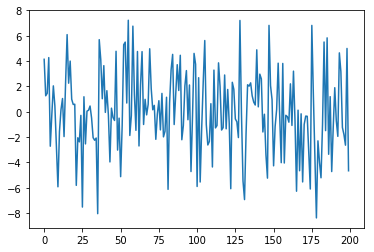

In [59]:
plt.plot(model.resid);

# Çoklu Doğrusal Regrasyon Modeli 

In [60]:
# ters ve Train olarak ayırma işlemlerine başlayacağız. 

In [61]:
import pandas as pd 
ad= pd.read_csv("Advertising.csv", usecols=[1,2,3,4])
df=ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [62]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
#train_test_split train ve test ayrımı için bir fonk aldık. 
#cross_val_score cross validation skorunu hesaplamak için bir fonk aldık. 
#cross_val_predict cross validation skorunu tahmin etmek için bir fonk aldık. 

In [63]:
# df içinden sales değerini dışarda bırakmak. 
X = df.drop("sales", axis=1)

In [64]:
y = df["sales"]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=42)

In [66]:
X_train.shape

(160, 3)

In [67]:
X_test.shape

(40, 3)

In [68]:
y_train.shape

(160,)

In [69]:
y_test.shape

(40,)

In [70]:
training= df.copy()
training.shape

(200, 4)

# Stats Model 

Yorumlama ihtiyacımız varsa kullanılır. Eğer yoruma ihtiyaç yoksa sklearn kullanılır 

In [71]:
lm = sm.OLS(y_train,X_train)
model= lm.fit()
model.summary()
# R-squared ve Adj. R-squared bağımlı değişkendeki değişikliğin bağımsız değişkenlerce açıklanabilme 
#oranını vermektedir. Yani modeldeki bağımsız değişkenler elimizdeki bağımlı dğişkenin varyansının 
#şu kadarını açıklar. yani varyans açıklama oranıdır. F-statistic ise modelin anlamlılığını verir.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     2935.
Date:                Fri, 10 Dec 2021   Prob (F-statistic):          1.28e-137
Time:                        17:32:12   Log-Likelihood:                -336.65
No. Observations:                 160   AIC:                             679.3
Df Residuals:                     157   BIC:                             688.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Scikit-Learn Model 

In [72]:
# Modellerin tahmin başarısını değerledirmek için rmse mse gibi değerlere bakılmalıdır. 

In [73]:
lm= LinearRegression()
model= lm.fit(X_train, y_train)
#Model eğitilirken sadece train verisine fit uygulanır. 

In [74]:
model.intercept_   #Sabit katsayı 

2.979067338122629

In [75]:
model.coef_   # Modeldeki tüm bağımsız değişkenlerin katsayıları. 

array([0.04472952, 0.18919505, 0.00276111])

## Tahmin 

Model denklemi:

Sales = 2.97 + TV0.04 + radio0.18 + newspaper*0.002

Örneğin 30 birim TV harcaması, 10 birim radio harcamasi, 40 birimde gazete harcaması olduğunda satışların tahmini değeri ne olur?

In [76]:
yeni_veri=[[30],[10],[40]]

In [77]:
yeni_veri= pd.DataFrame(yeni_veri).T

In [78]:
model.predict(yeni_veri) #Sorunu cevabı , modelin tahmini 

array([6.32334798])

In [79]:
#modelin başarısı eğitim hatası değeri 
from sklearn.metrics import mean_squared_error, r2_score
rmse= np.sqrt(mean_squared_error(y_train,model.predict(X_train) ))
rmse

1.644727765644337

In [80]:
rmset= np.sqrt(mean_squared_error(y_test,model.predict(X_test) ))
rmset

1.7815996615334502

# Çoklu Doğrusal Reg Model Tuning 

# Model Tunning/Model Doğrulama 

In [81]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [82]:
#Test-Train ve k katlı crossvaludation gibi yöntemlerle elde ettiğimiz hataları daha 
#doğru hataları elde etme çabasındayız.

In [83]:
X = df.drop('sales', axis=1)
y = df["sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=144)
lm = LinearRegression() 
model = lm.fit(X_train, y_train)
#Bu işlemleri yaparken random_state değeri değiştikçe sonuçlar değişir. Bu sorunu ortadan kaldırmak için
#crossvalidation yöntemi kullanılır.

In [84]:
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

1.6748559274650712

In [85]:
np.sqrt(-cross_val_score(model,
                X_train, 
                y_train, 
                cv=10, 
                scoring="neg_mean_squared_error")).mean()
#Üstteki değerden daha farklıdır. ve daha doğrudur.

1.6649345607872927

In [86]:
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

1.6640263686701036

In [87]:
np.sqrt(-cross_val_score(model,
                X_test, 
                y_test, 
                cv=10, 
                scoring="neg_mean_squared_error")).mean()
#daha gerçek ve daha doğru test hatası. 

1.7399924960346644

In [88]:
model.score(X_train, y_train)

0.8971614078663419

In [89]:
cross_val_score(model,X_train, y_train, cv=10 , scoring="r2").mean()
# crossvalidation uygulanmış değer öncekişnden farklıdır. ve daha güvenilirdir. 

0.8733783298422942

In [90]:
cross_val_score(model,X, y, cv=10 , scoring="r2").mean()
# bu R2 değeri bizim modelimizn daha doğru r2 değeridir.

0.8853562237979616

# PCR Model

In [91]:
hit = pd.read_csv("Hitters.csv")
df= hit.copy()
df = df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
AtBat        263 non-null int64
Hits         263 non-null int64
HmRun        263 non-null int64
Runs         263 non-null int64
RBI          263 non-null int64
Walks        263 non-null int64
Years        263 non-null int64
CAtBat       263 non-null int64
CHits        263 non-null int64
CHmRun       263 non-null int64
CRuns        263 non-null int64
CRBI         263 non-null int64
CWalks       263 non-null int64
League       263 non-null object
Division     263 non-null object
PutOuts      263 non-null int64
Assists      263 non-null int64
Errors       263 non-null int64
Salary       263 non-null float64
NewLeague    263 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 43.1+ KB


In [93]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [94]:
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [95]:
y=df["Salary"]

In [96]:
X_ = df.drop(df[["Salary","League","Division","NewLeague"]],axis=1).astype("float64")

In [97]:
X_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [98]:
X = pd.concat([X_, dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

training = df.copy()

print("training", training.shape)

X_train (197, 19)
y_train (197,)
X_test (66, 19)
y_test (66,)
training (263, 20)


In [100]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA()

In [101]:
X_reduced_train= pca.fit_transform(scale(X_train))
#genellikle Train datasına fit_transfom methodu uygulanır.

In [102]:
X_reduced_train[0:1,:]

array([[-2.49569913e+00, -3.37762397e-01,  7.06391950e-01,
        -1.32791025e+00, -8.21824333e-01, -6.62790677e-01,
        -6.56764789e-01,  3.68093279e-02, -2.03665105e-01,
         1.76134815e-01, -9.20131987e-02,  2.40129020e-01,
        -3.60473661e-03, -3.41246327e-02,  4.32799605e-02,
         1.02996923e-01,  3.70733348e-03,  1.37933445e-03,
        -6.63814471e-03]])

In [103]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:5]
#19 değişken varken boyutunu indirgedik 

array([38.18, 59.88, 70.88, 78.88, 84.18])

In [104]:
lm=LinearRegression()

In [105]:
pcr_model= lm.fit(X_reduced_train, y_train)
#sonra indirgenmiş veri seti üzerine LinearRegressionu fit ettik. 

In [106]:
pcr_model.intercept_
#istediğimiz değerlere eriştik.

543.4834416243655

In [107]:
pcr_model.coef_

array([ 111.13977427,  -29.34209502,   26.29799759,  -38.47549852,
        -56.9200785 ,   54.44779423,   40.77493384,  -23.72746012,
          9.31198164,   13.02031672,   45.58357748,   31.97791627,
         18.93930958, -115.60940171,   24.00382778,  415.70806202,
       -449.51779543,  563.07375399,  302.53718462])

# PCR Tahmin 

In [108]:
y_pred = pcr_model.predict(X_reduced_train)
y_pred[0:5]
#Bunlar tahmin edilen değerler .

array([377.44484744, 802.19452124, 495.60987745, 112.53177731,
       426.21613066])

In [109]:
#train setimiz için hataları hesaplayalım. 
np.sqrt(mean_squared_error(y_train, y_pred))

289.3292825564976

In [110]:
df["Salary"].mean()

535.9258821292775

In [111]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y_train, y_pred)

0.5770075250410179

In [112]:
#Test Hatamızı inceleyelim
pca2=PCA()

In [113]:
X_reduced_test= pca2.fit_transform(scale(X_test))

In [114]:
y_pred = pcr_model.predict(X_reduced_test)

In [115]:
np.sqrt(mean_squared_error(y_test, y_pred))

405.15753641499646

## PCR Model Tunnig

In [116]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test, y_pred)))
# Buradaki değer sayılarını değiştirdikçe hata çıktımız değişir bunu yine crossval ile optimum bileşen
#sayımızı belirleme işlemi yapacağız.

390.79142556822234


In [117]:
from sklearn import model_selection

In [118]:
# 10 katlı cross valudation yapılanması yapıyoruz.
cv_10= model_selection.KFold(n_splits=10,
                            shuffle= True,
                            random_state= 1)
# Verilerin gruplara ayrılmadan önce karıştırılıp karıştırılmatacağını ifade eder 

In [119]:
lm=LinearRegression()

In [120]:
RMSE=[]

In [121]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)
 

 #Normalde bu işlemi yapmayacağız ama sklearn ün kendi içinde native pcr testi yok kendimiz yapıyoruz.
 #Her bir bileşen sayısı için model kuracak ve her bir bileşen sayısı için Kkatlıcrossvalidaton uygulayıp 
#hata değerlerini elde edip bize hangi bileşen sayısının daha az hata oluşturduğu bilgisini sunacak.  

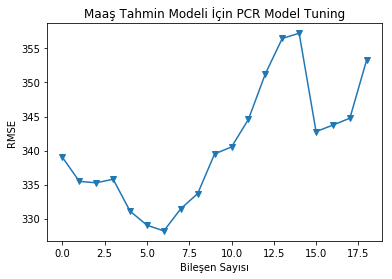

In [122]:
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Maaş Tahmin Modeli İçin PCR Model Tuning');

In [123]:
lm=LinearRegression()

In [124]:
pcr_model = lm.fit(X_reduced_train[:,0:6], y_train)

In [125]:
y_pred = pcr_model.predict(X_reduced_train[:,0:6])

In [126]:
print(np.sqrt(mean_squared_error(y_train, y_pred)))

308.8265983094501


In [127]:
y_pred = pcr_model.predict(X_reduced_test[:,0:6])

In [128]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

393.1198700096223


## PLS MODEL 

In [129]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [130]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [131]:
pls_model= PLSRegression().fit(X_train, y_train)

In [132]:
pls_model.coef_

array([[ 35.32916493],
       [ 48.83425857],
       [ 18.50240933],
       [ 39.28117603],
       [ 30.59952998],
       [ 40.03398345],
       [ 16.85990516],
       [ 28.22289896],
       [ 32.73784993],
       [ 22.00875744],
       [ 33.60903032],
       [ 30.39402522],
       [ 25.73279799],
       [ 54.98835148],
       [  6.56590871],
       [ -0.90894359],
       [ 17.60903423],
       [-37.24246339],
       [ 14.69680385]])

## PLS Tahmin

In [133]:
pls_model.predict(X_train)[0:10]

array([[344.91941493],
       [848.87070769],
       [692.93622642],
       [185.56577984],
       [435.49196077],
       [987.49530026],
       [120.63097106],
       [289.9263406 ],
       [663.41886918],
       [817.90486641]])

In [134]:
# train ve test hatalarını validation a girmeden değerlendireceğiz. 

In [135]:
y_pred= pls_model.predict(X_train)

In [136]:
np.sqrt(mean_squared_error(y_train, y_pred))
#train hatamız 310 

310.1167593109696

In [137]:
r2_score(y_train, y_pred)

0.5140424486535482

In [139]:
y_pred= pls_model.predict(X_test)

In [141]:
np.sqrt(mean_squared_error(y_test, y_pred))
#test hatamız 398

#genelde test hatası train hatasından yüksek çıkar. 

398.09956327448526

# PLS MODEL TUNNİG 

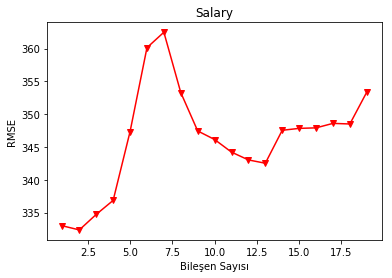

In [142]:
#CV
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)


#Hata hesaplamak için döngü
RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

#Sonuçların Görselleştirilmesi
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Salary');

In [143]:
#Final modeli oluşturma
pls_model= PLSRegression(n_components=2).fit(X_train, y_train)

In [144]:
y_pred= pls_model.predict(X_test)

In [145]:
np.sqrt(mean_squared_error(y_test, y_pred))
#pls modelinde ulaşabileceğmi optimum hata değeri 398 

398.09956327448526

## Ridge Regrasyon 

In [155]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [156]:
from sklearn.linear_model import Ridge

In [157]:
ridge_model= Ridge(alpha= 0.1).fit(X_train,y_train)

In [158]:
ridge_model

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [159]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

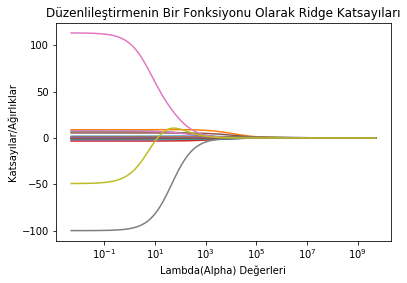

In [160]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train) 
    katsayilar.append(ridge_model.coef_) 
    

    
ax = plt.gca()
ax.plot(lambdalar, katsayilar) 
ax.set_xscale('log') 

plt.xlabel('Lambda(Alpha) Değerleri')
plt.ylabel('Katsayılar/Ağırlıklar')
plt.title('Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları');

## Ridge Tahmin

In [163]:
y_pred= ridge_model.predict(X_test)

In [164]:
#test hesaplaması 
np.sqrt(mean_squared_error(y_test, y_pred))

357.0517922282844

## Ridge Model Tunning 

In [166]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 

In [167]:
from sklearn.linear_model import RidgeCV

In [170]:
ridge_cv= RidgeCV(alphas= lambdalar , scoring="neg_mean_squared_error", normalize=True)

In [172]:
ridge_cv.fit(X_train,y_train)

RidgeCV(alphas=array([5.00000e+09, 3.78232e+09, ..., 6.60971e-03, 5.00000e-03]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=True,
    scoring='neg_mean_squared_error', store_cv_values=False)

In [173]:
ridge_cv.alpha_

0.7599555414764666

In [174]:
ridge_tuned = Ridge(alpha = ridge_cv.alpha_, 
                   normalize = True).fit(X_train,y_train)

In [175]:
np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))
#Test Hatası 386

386.6826429756415

## Lasso Regresyon - Model

In [ ]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [176]:
from sklearn.linear_model import Lasso 

In [177]:
lasso_model= Lasso(alpha= 0.1).fit(X_train,y_train)

/home/gulce/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [178]:
lasso_model

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [180]:
lasso_model.coef_

array([-1.72206506e+00,  8.56210197e+00,  6.91175137e+00, -3.13240128e+00,
       -2.00771676e+00,  5.36159035e+00,  8.86871593e+00, -1.69520371e-01,
       -5.58121413e-02, -3.53962588e-01,  1.70961000e+00,  6.40603469e-01,
       -6.58519895e-01,  2.60093222e-01,  2.78717030e-01, -5.92690965e-01,
        1.12659630e+02, -9.99652090e+01, -4.81289395e+01])

/home/gulce/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/gulce/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/gulce/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/gulce/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not conver

Text(0,0.5,'weights')

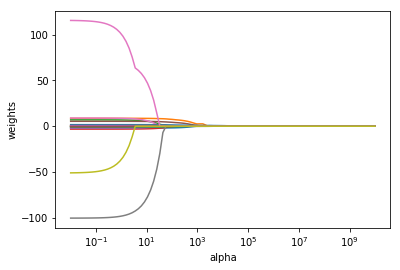

In [181]:
lasso = Lasso()
lambdalar = 10**np.linspace(10,-2,100)*0.5 
katsayilar = []

for i in lambdalar:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    katsayilar.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(lambdalar*2, katsayilar)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

## Lasso Tahmin

In [183]:
lasso_model.predict(X_test)

array([ 613.88833029,  701.97056731, 1005.55539526,  414.08312603,
        399.18417127,  344.71444139,  664.86990217,  451.60757   ,
        914.64492066,  644.67006406,  691.60613554,  884.71702368,
        210.04523766,  446.12527252,  262.94922087,  499.22332142,
        805.2275034 ,   43.49230343, 1250.49322312,  316.34470193,
        422.96656686,  743.29944548,  572.90774248,  655.15609074,
        618.96407069,  200.75845796,  882.64622066,  254.06366112,
        430.25494812,   84.17391461,  143.60312305,  130.61554   ,
        363.74498233,  461.7321162 ,  273.42345417,  244.49816262,
       1324.62748553,  107.89909718,  135.63065031,  242.72630885,
         51.70024086,  297.57598929,  586.86143037,  398.85227639,
        763.99543074,  690.10003532,  344.06272851,  247.43966241,
        255.13234043,  662.89091837,  765.66189   ,  313.57347726,
        765.84996179,  189.77235179,  283.98765436,  589.95238974,
        663.31166365,  803.29524626,  164.99767232, 1170.24294

In [185]:
y_pred= lasso_model.predict(X_test)

In [186]:
np.sqrt(mean_squared_error(y_test, y_pred))

356.7545270148771

## Lasso Model Tunning 

In [187]:
from sklearn.linear_model import LassoCV

In [188]:
lasso_cv_model = LassoCV(alphas = None, 
                         cv = 10, 
                         max_iter = 10000, 
                         normalize = True)

In [189]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=10000, n_alphas=100, n_jobs=1, normalize=True, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [190]:
lasso_cv_model.alpha_
#optimum cv 

0.39406126432470073

In [191]:
# Final modeli 
lassa_tuned= Lasso (alpha= lasso_cv_model.alpha_)

In [192]:
lassa_tuned.fit(X_train,y_train)

/home/gulce/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.39406126432470073, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [196]:
y_pred= lassa_tuned.predict(X_test)

In [197]:
# final modelin test hatası 
np.sqrt(mean_squared_error(y_test, y_pred))
#Ridge modele göre 30 birim daha az hatalı 

356.52263769583686

## ElasticNet Ragrasyonu 

In [198]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [199]:
from sklearn.linear_model import ElasticNet

In [201]:
enet_model= ElasticNet().fit(X_train,y_train)

/home/gulce/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [202]:
enet_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

## ENET TAHMİN

In [203]:
enet_model

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [207]:
y_pred = enet_model.predict(X_test)
y_pred

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123,  702.9157117 ,  931.50283407,
        184.87939803,  385.14973787,  325.38944176,  546.99346574,
        774.28001821,  101.83114992, 1250.86758812,  370.67651244,
        442.05734523,  781.17288513,  578.63736538,  609.31927808,
        608.31719597,  227.46556223,  921.85505228,  301.1202457 ,
        386.31721051,  133.61143326,  162.28505608,   88.29793182,
        359.9068418 ,  422.51268445,  265.8663769 ,  355.70450908,
       1329.36312363,  125.05506935,   82.74580002,  269.17483075,
        117.13319397,  274.13484779,  648.4957249 ,  409.47065999,
        846.27919406,  712.04817644,  341.10596674,  368.24259678,
        305.70477656,  680.05724792,  716.13640636,  295.93204262,
        773.06445823,  249.28224916,  221.46794589,  541.2713245 ,
        611.50212372,  770.80228024,  168.45143906, 1159.05660

In [209]:
np.sqrt(mean_squared_error(y_test, y_pred))


357.1676548181245

In [210]:
r2_score(y_test, y_pred)

0.4107022246932689

### ENET Model Tunning 

In [211]:
from sklearn.linear_model import ElasticNetCV

In [214]:
# model kurma Eğitim seti üzerinde ntrain 
enet_cv_model = ElasticNetCV(cv= 10 , random_state= 1 ).fit(X_train,y_train)

In [215]:
enet_cv_model.alpha_

5230.7647364798695

In [216]:
enet_tuned= ElasticNet(alpha= enet_cv_model.alpha_).fit(X_train,y_train)

In [217]:
y_pred= enet_tuned.predict(X_test)

In [218]:
np.sqrt(mean_squared_error(y_test, y_pred))

394.15280563218795

In [ ]:
# Son üç model içinde Elimizdeki veri seti için en iyi çalışan model lassodur 